In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("C://Users//User//Desktop//MSc Westminster//Data Warehousing and Business Intelligence//CourseWork_2//Basket_dataset.csv")
df.head(5)

,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk


In [2]:
df.shape

(38765, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


---  Statistcal & Distribution Analysis ---

--- Item Description Analysis ---

In [6]:
item_counts= df['itemDescription'].value_counts().sort_values(ascending=False)
item_counts.describe()

count     167.000000
mean      232.125749
std       363.442098
min         1.000000
25%        30.500000
50%        85.000000
75%       264.000000
max      2502.000000
Name: itemDescription, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

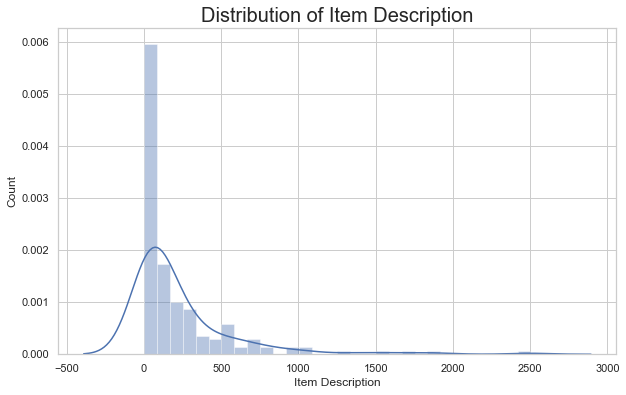

In [7]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(item_counts)
plt.title('Distribution of Item Description', fontsize = 20)
plt.xlabel('Item Description')
plt.ylabel('Count')

--- Members Analysis ---

In [8]:
customer_item_counts = df.groupby('Member_number')['itemDescription'].count().sort_values(ascending=False)
customer_item_counts.describe()

count    3898.000000
mean        9.944844
std         5.310796
min         2.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        36.000000
Name: itemDescription, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

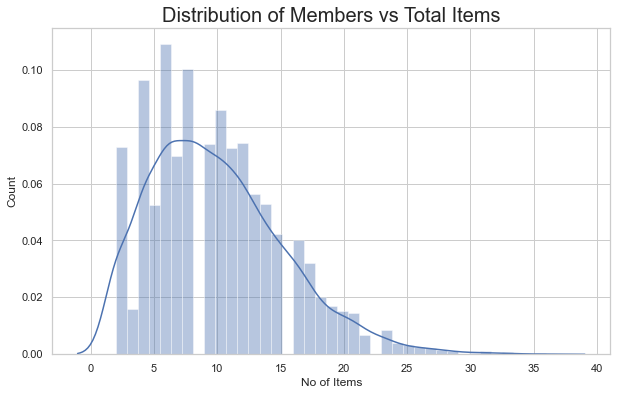

In [9]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer_item_counts)
plt.title('Distribution of Members vs Total Items', fontsize = 20)
plt.xlabel('No of Items')
plt.ylabel('Count')

In [10]:
unique_customers_per_day = df.groupby('Date')['Member_number'].nunique().sort_values(ascending=False)
unique_customers_per_day.describe()

count    728.000000
mean      20.553571
std        4.740865
min        7.000000
25%       17.000000
50%       20.000000
75%       24.000000
max       39.000000
Name: Member_number, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

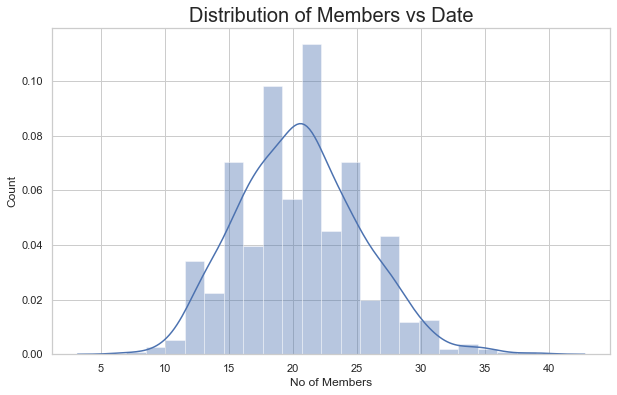

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(unique_customers_per_day)
plt.title('Distribution of Members vs Date', fontsize = 20)
plt.xlabel('No of Members')
plt.ylabel('Count')

In [12]:
no_of_items_per_member= df.groupby(df['Member_number']).size().reset_index(name= 'No_of_items')
no_of_items_per_member_per_busket= df.groupby([df['Member_number'], df['Date'].dt.date]).size().reset_index(name='No_of_items')
busket_per_member= df.groupby([df['Member_number'], df['Date'].dt.date])['Date'].nunique().reset_index(name='No_of_Buskets')
no_of_buskets_per_member= busket_per_member.groupby('Member_number')['Date'].nunique().reset_index(name='No_of_Buskets')
no_of_buskets_and_no_of_items_per_member= pd.merge(no_of_buskets_per_member, no_of_items_per_member, on='Member_number')
no_of_buskets_and_no_of_items_per_member['Avg_itmes']= (no_of_buskets_and_no_of_items_per_member['No_of_items']/no_of_buskets_and_no_of_items_per_member['No_of_Buskets']).round(0)
no_of_buskets_and_no_of_items_per_member.head(5)

,Member_number,No_of_Buskets,No_of_items,Avg_itmes
0,1000,5,13,3.0
1,1001,5,12,2.0
2,1002,4,8,2.0
3,1003,4,8,2.0
4,1004,8,21,3.0


In [13]:
no_of_buskets_and_no_of_items_per_member['No_of_Buskets'].describe()

count    3898.000000
mean        3.838635
std         1.883678
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        11.000000
Name: No_of_Buskets, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

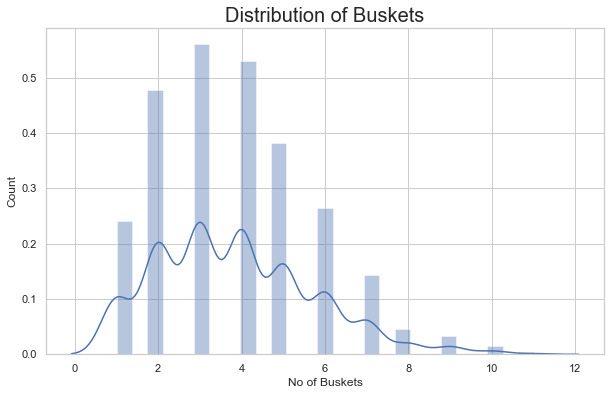

In [14]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(no_of_buskets_and_no_of_items_per_member['No_of_Buskets'])
plt.title('Distribution of Buskets', fontsize = 20)
plt.xlabel('No of Buskets')
plt.ylabel('Count')

--- Association identification  ---

In [15]:
df1= df
df1['transaction']= df1['Member_number'].astype(str)+'_'+df1['Date'].astype(str)
df1.head()

,Member_number,Date,itemDescription,transaction
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


In [16]:
df1= pd.crosstab(df1['transaction'], df1['itemDescription'])
df1.head(5)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_transform= df1.applymap(encode)
basket_transform.head(5)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

freq_items= apriori(basket_transform, min_support=0.001, use_colnames=True)
associations= association_rules(freq_items, metric="lift")
associations.head(5)

C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(sausage),(UHT-milk),0.060349,0.021386,0.001136,0.018826,0.880298,-0.000154,0.997391,-0.126418


In [19]:
associations.sort_values(["support", "confidence", "lift"], axis=0, ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
694,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
695,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
550,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
648,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
649,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
624,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
625,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


--- RFM ---

In [20]:
import sqlite3
con= sqlite3.connect('Test')
cur= con.cursor()

In [21]:
df.to_sql('Basket_dataset', con)

38765

In [22]:
cleandata= pd.read_sql(''' SELECT Member_number
                               ,MAX(Date) AS last_order_date
                               ,COUNT(DISTINCT Date) AS no_of_buskets
                               ,COUNT(*) AS no_of_items
                           FROM Basket_dataset
                           GROUP BY Member_number''', con)
cleandata.head(5)

,Member_number,last_order_date,no_of_buskets,no_of_items
0,1000,2015-11-25 00:00:00,5,13
1,1001,2015-05-02 00:00:00,5,12
2,1002,2015-08-30 00:00:00,4,8
3,1003,2015-02-10 00:00:00,4,8
4,1004,2015-12-02 00:00:00,8,21


In [23]:
cleandata.to_sql("cleandata", con)

3898

In [24]:
cleandata.dtypes

Member_number       int64
last_order_date    object
no_of_buskets       int64
no_of_items         int64
dtype: object

In [25]:
import numpy as np
import datetime
cleandata['last_order_date'] = pd.to_datetime(cleandata['last_order_date'])
cleandata.dtypes

Member_number               int64
last_order_date    datetime64[ns]
no_of_buskets               int64
no_of_items                 int64
dtype: object

In [26]:
snapshot_date= cleandata['last_order_date'].max() + datetime.timedelta(days=1)
print(snapshot_date)

2015-12-31 00:00:00


In [27]:
customers= cleandata.groupby(['Member_number']).agg({
                                                       'last_order_date': lambda x: (snapshot_date - x.max()).days,
                                                       'no_of_buskets':'sum',
                                                       'no_of_items': 'sum'
                                                        })

In [28]:
customers.rename(columns= {'last_order_date': 'Recency',
                            'no_of_buskets': 'Frequency',
                            'no_of_items': 'MonetaryValue'}, inplace=True)

In [29]:
customers.head(5)

,Recency,Frequency,MonetaryValue
Member_number,,,
1000,36,5,13
1001,243,5,12
1002,123,4,8
1003,324,4,8
1004,29,8,21


In [30]:
customers.to_sql("customers", con)

3898

---  DBSCAN  ---

In [31]:
customers.head(5)

,Recency,Frequency,MonetaryValue
Member_number,,,
1000,36,5,13
1001,243,5,12
1002,123,4,8
1003,324,4,8
1004,29,8,21


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

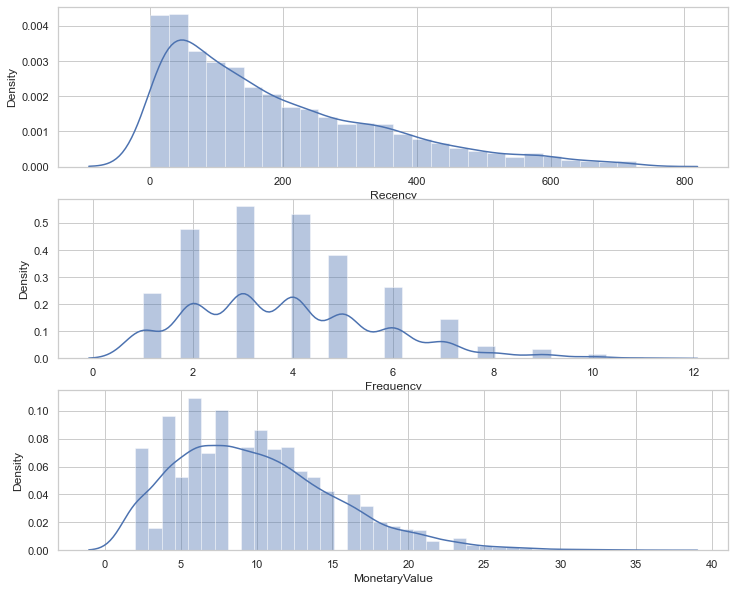

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(customers['Recency'])
plt.subplot(3, 1, 2); sns.distplot(customers['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(customers['MonetaryValue'])

plt.show()

In [33]:
from scipy import stats
customers_fix= pd.DataFrame()
customers_fix["Recency"]= stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"]= stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"]= stats.boxcox(customers['MonetaryValue'])[0]
customers_fix.tail()

,Recency,Frequency,MonetaryValue
3893,7.016236,1.412097,3.847542
3894,1.763905,0.810273,2.654617
3895,9.852175,0.000000,0.802660
3896,2.132343,2.725071,5.191431
3897,17.690836,1.412097,2.988455


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

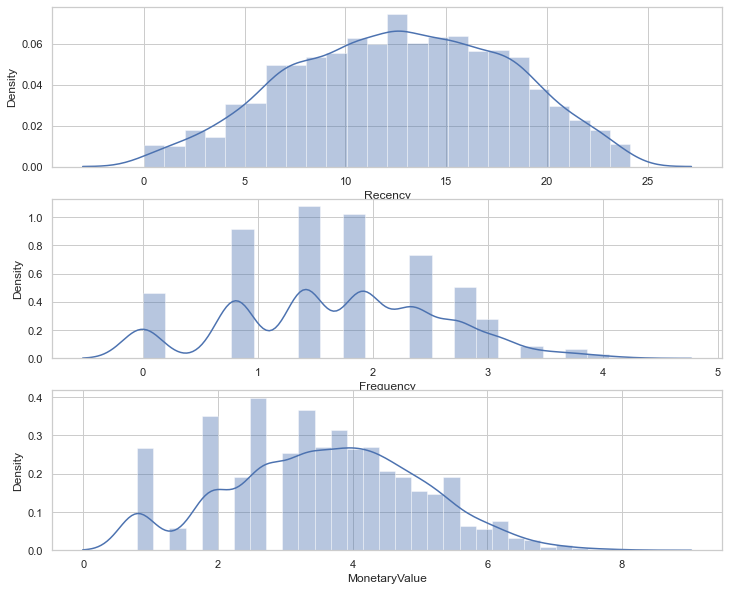

In [34]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])
plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(customers_fix['MonetaryValue'])

plt.show()

--- Normalisation ---

In [35]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(customers_fix)
customers_normalized= scaler.transform(customers_fix)

print(customers_normalized.mean(axis= 0).round(2))
print(customers_normalized.std(axis= 0).round(2))

[ 0. -0.  0.]
[1. 1. 1.]


In [36]:
customers_normalized_df= pd.DataFrame(customers_normalized, columns= customers_fix.columns)
customers_normalized_df.head(5)

,Recency,Frequency,MonetaryValue
0,-1.083711,0.700267,0.679759
1,0.588682,0.700267,0.518780
2,-0.132977,0.224643,-0.219648
3,0.946600,0.224643,-0.219648
4,-1.214202,1.868441,1.764258


In [37]:
from sklearn.neighbors import NearestNeighbors

neighbors= NearestNeighbors(n_neighbors= 6)
neighbors_fit= neighbors.fit(customers_normalized_df)
distances, indices= neighbors_fit.kneighbors(customers_normalized_df)

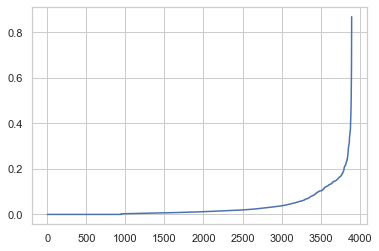

In [38]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

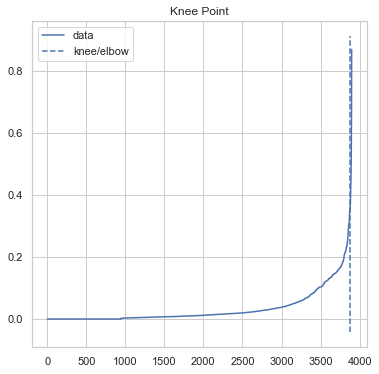

epsilon= 0.35


In [39]:
from kneed import KneeLocator
kneedle= KneeLocator(x = range(1, len(distances)+1), y= distances, S= 1.0,
                      curve= "concave", direction= "increasing", online= True)

kneedle.plot_knee()
plt.show()
print('epsilon=',round(kneedle.knee_y,2))

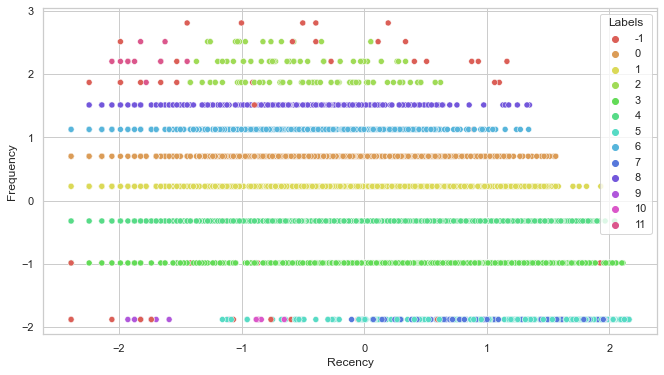

In [40]:
from sklearn.cluster import DBSCAN

db= DBSCAN(eps= 0.35, min_samples= 6).fit(customers_normalized_df)

customers_normalized_df['Labels']= db.labels_
plt.figure(figsize=(11, 6))
sns.scatterplot(x= "Recency", y= "Frequency", data= customers_normalized_df, hue= customers_normalized_df.Labels,
                palette= sns.color_palette('hls', np.unique(db.labels_).shape[0]))

plt.show()

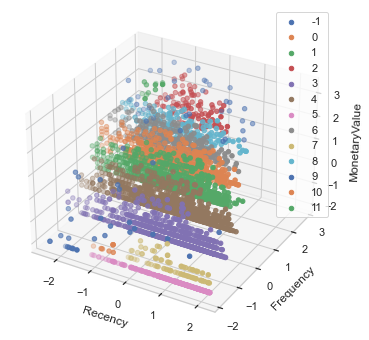

In [41]:
from mpl_toolkits.mplot3d import Axes3D
db= DBSCAN(eps= 0.35, min_samples= 6).fit(customers_normalized_df[['Recency', 'Frequency', 'MonetaryValue']])
customers_normalized_df['Labels']= db.labels_
fig= plt.figure(figsize=(11, 6))
ax= fig.add_subplot(111, projection= '3d')
for label in np.unique(db.labels_):
    cluster= customers_normalized_df[customers_normalized_df['Labels']== label]
    ax.scatter(cluster['Recency'], cluster['Frequency'], cluster['MonetaryValue'], label= label)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
ax.legend()

plt.show()

--- DBSCAN Segmentation Cluster Size ---

In [42]:
DBSCAN_clust_sizes= customers_normalized_df.groupby('Labels').size().to_frame()
DBSCAN_clust_sizes.columns= ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Labels,
-1,59
0,550
1,767
2,104
3,682
4,809
5,237
6,376
7,80


In [43]:
labels1= db.labels_
from sklearn import metrics
print(metrics.silhouette_score(customers_normalized_df, labels1))

0.40821189486172416


In [44]:
customers["Cluster"]= db.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
-1       120.07      5.58         18.05    59
 0       137.77      5.00         12.87   550
 1       159.83      4.00         10.43   767
 2        93.54      8.59         21.84   104
 3       260.20      2.00          5.15   682
 4       197.91      3.00          7.81   809
 5       396.71      1.00          2.00   237
 6       100.37      6.00         15.43   376
 7       385.48      1.00          3.61    80
 8        94.86      7.00         17.75   206
 9         9.00      1.00          2.00     9
 10       60.88      1.00          3.25     8
 11        9.18      9.09         23.91    11

,Recency,Frequency,MonetaryValue
Cluster,,,
-1,59,59,59
0,550,550,550
1,767,767,767
2,104,104,104
3,682,682,682
4,809,809,809
5,237,237,237
6,376,376,376
7,80,80,80


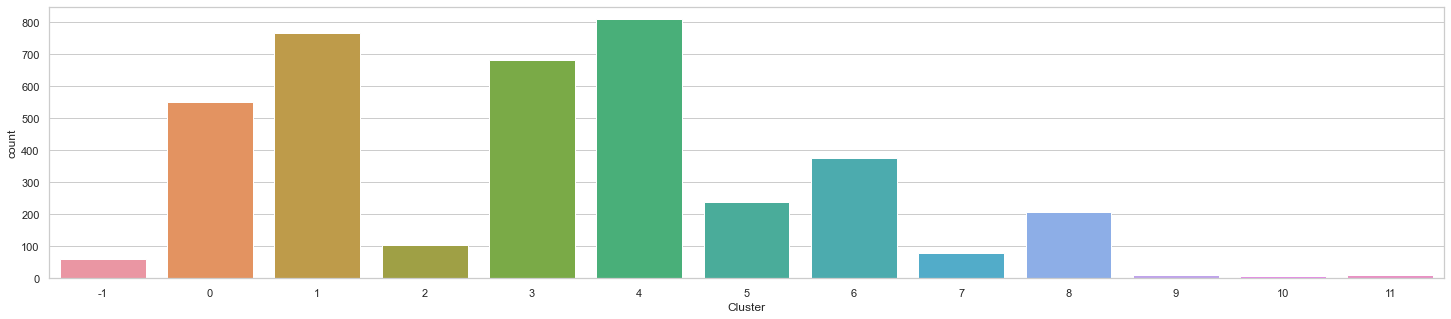

In [45]:
db.labels_.shape
customers["Cluster"]= db.labels_
customers.groupby('Cluster').agg({
                                  'Recency':'mean',
                                  'Frequency':'mean',
                                  'MonetaryValue':['mean', 'count']}).round(2)

f, ax= plt.subplots(figsize=(25, 5))
ax= sns.countplot(x= "Cluster", data= customers)
customers.groupby(['Cluster']).count()


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
C:\Users\User\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
C:\Users\User\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDepreca

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

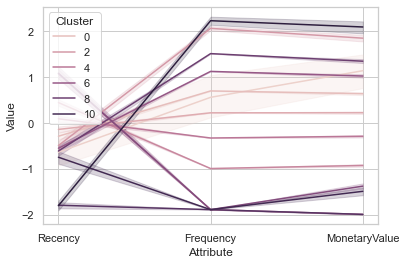

In [46]:
df_normalized = pd.DataFrame(customers_normalized_df, columns= ['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID']= customers.index
df_normalized['Cluster']= db.labels_

df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars= ['ID', 'Cluster'],
                      value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                      var_name= 'Attribute',
                      value_name= 'Value')
df_nor_melt.head()

sns.lineplot('Attribute', 'Value', hue= 'Cluster', data= df_nor_melt)


----------------------------------------------------------------------------------------------

In [47]:
customers["Cluster"]= db.labels_
rfm_df= customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)
rfm_df

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
-1       120.07      5.58         18.05    59
 0       137.77      5.00         12.87   550
 1       159.83      4.00         10.43   767
 2        93.54      8.59         21.84   104
 3       260.20      2.00          5.15   682
 4       197.91      3.00          7.81   809
 5       396.71      1.00          2.00   237
 6       100.37      6.00         15.43   376
 7       385.48      1.00          3.61    80
 8        94.86      7.00         17.75   206
 9         9.00      1.00          2.00     9
 10       60.88      1.00          3.25     8
 11        9.18      9.09         23.91    11

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

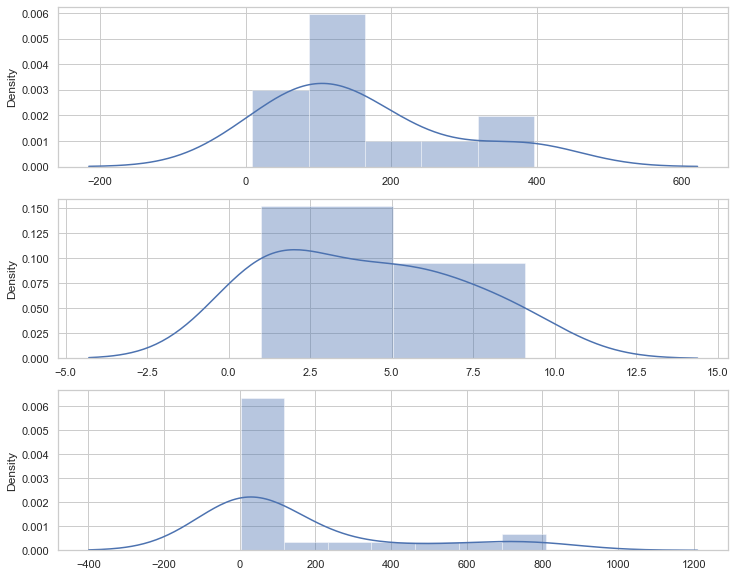

In [48]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(rfm_df['MonetaryValue'])

plt.show()

In [49]:
rfm_df= pd.DataFrame({
    'Recency': [120.07, 137.77, 159.83, 93.54, 260.20, 197.91, 396.71, 100.37, 385.48, 94.86, 9.00, 60.88, 9.18],
    'Frequency': [5.58, 5.00, 4.00, 8.59, 2.00, 3.00, 1.00, 6.00, 1.00, 7.00, 1.00, 1.00, 9.09],
    'MonetaryValue': [18.05, 12.87, 10.43, 21.84, 5.15, 7.81, 2.00, 15.43, 3.61, 17.75, 2.00, 3.25, 23.91],
    'Cluster': [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'RFM': [''] * 13
})

def map_to_rfm(row):
    recency_bins= [-float('inf'), 50, 100, 200, 300, float('inf')]
    recency_labels= ['VH', 'H', 'M', 'L', 'VL']
    
    fm_bins= [-float('inf'), 2.5, 3.5, 5.5, 7, float('inf')]
    fm_labels= ['VL', 'L', 'M', 'H', 'VH']
    
    rfm_categories= [recency_labels[i] for i in pd.cut([row['Recency']], bins= recency_bins, labels= False)]
    
    rfm_categories.extend([fm_labels[i] for i in pd.cut([row['Frequency'], row['MonetaryValue']], bins= fm_bins, labels= False)])
    
    return ' '.join(rfm_categories)

rfm_df['RFM']= rfm_df.apply(map_to_rfm, axis= 1)

print(rfm_df)

    Recency  Frequency  MonetaryValue  Cluster       RFM
0    120.07       5.58          18.05       -1    M H VH
1    137.77       5.00          12.87        0    M M VH
2    159.83       4.00          10.43        1    M M VH
3     93.54       8.59          21.84        2   H VH VH
4    260.20       2.00           5.15        3    L VL M
5    197.91       3.00           7.81        4    M L VH
6    396.71       1.00           2.00        5  VL VL VL
7    100.37       6.00          15.43        6    M H VH
8    385.48       1.00           3.61        7   VL VL M
9     94.86       7.00          17.75        8    H H VH
10     9.00       1.00           2.00        9  VH VL VL
11    60.88       1.00           3.25       10    H VL L
12     9.18       9.09          23.91       11  VH VH VH


---  Cluster Segmentation  --

In [50]:
rfm_df = pd.merge(rfm_df, DBSCAN_clust_sizes, left_on='Cluster', right_index=True, how='left')
rfm_df = rfm_df.rename(columns={'DBSCAN_size': 'DBSCAN_size'})
rfm_df['DBSCAN_size'] = rfm_df['DBSCAN_size'].fillna(0)

def map_segments(cluster):
    if cluster in [2, 11]:
        return 'High-Value Customers'
    elif cluster in [0, 1]:
        return 'Regular Spenders'
    elif cluster in [4, 6, 8]:
        return 'Big Spenders'
    elif cluster in [3, 5, 7]:
        return 'Low-Engagement Customers'
    elif cluster in [9, 10]:
        return 'Inactive Customers'
    else:
        return 'Noise'
    
rfm_df['Segments by Spending'] = rfm_df['Cluster'].apply(map_segments)

segmentation_df = rfm_df.groupby('Segments by Spending')['DBSCAN_size'].sum().reset_index()
segmentation_df.columns = ['Segments by Spending', 'Total DBSCAN_size']
segmentation_df

,Segments by Spending,Total DBSCAN_size
0,Big Spenders,1391
1,High-Value Customers,115
2,Inactive Customers,17
3,Low-Engagement Customers,999
4,Noise,59
5,Regular Spenders,1317


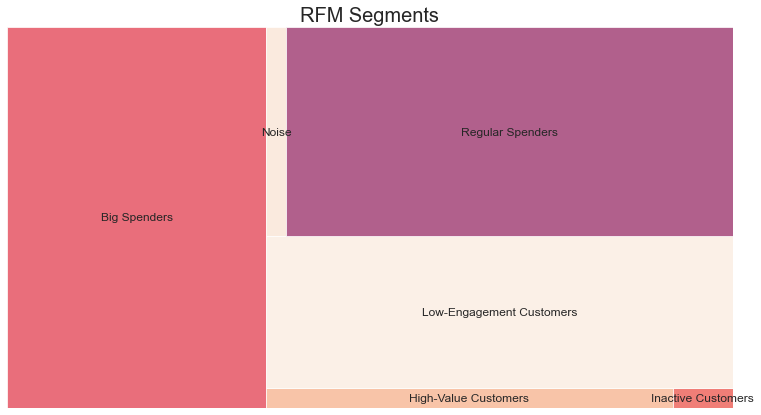

In [51]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 7)
squarify.plot(sizes=segmentation_df['Total DBSCAN_size'], 
              label=['Big Spenders',
                     'High-Value Customers',
                     'Inactive Customers',
                     'Low-Engagement Customers',
                     'Noise', 
                     'Regular Spenders'], alpha=0.7)
plt.title("RFM Segments",fontsize=20)
plt.axis('off')
plt.show()